In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../data/extracted_data.csv")


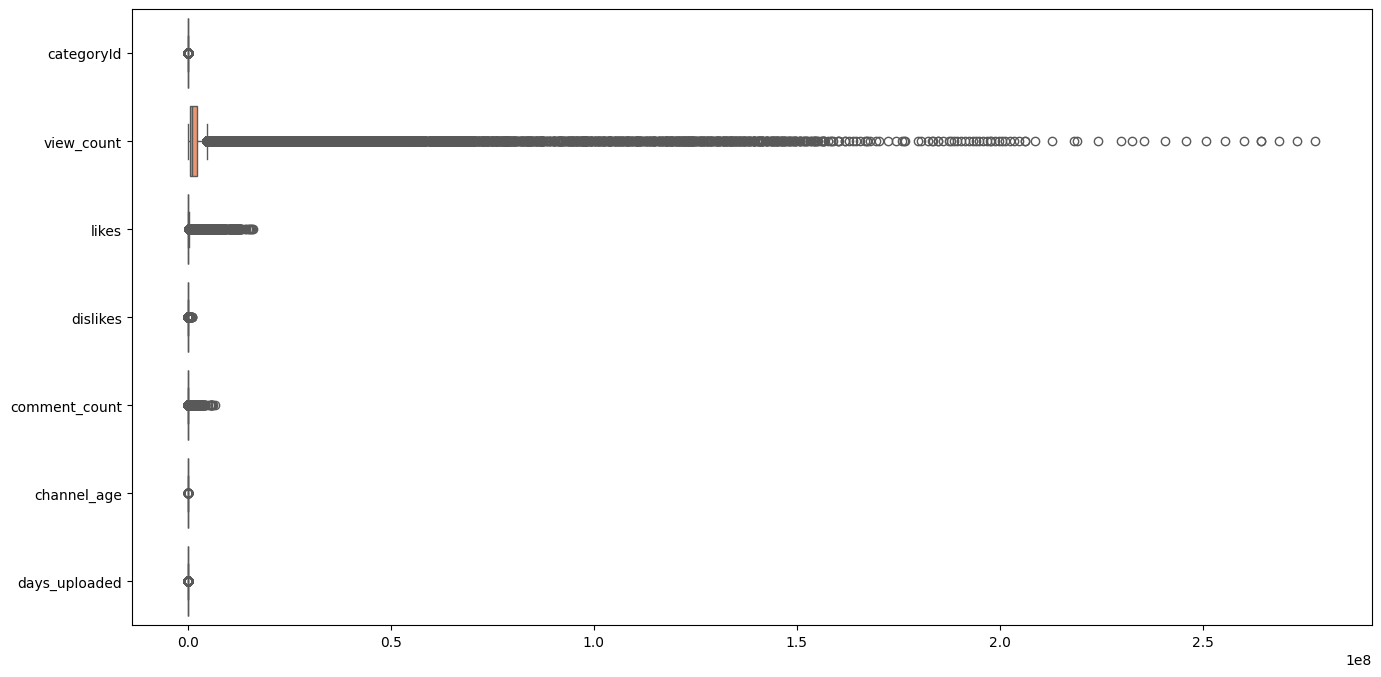

In [3]:
#detekcija autlajera
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, orient="h", palette="Set2")


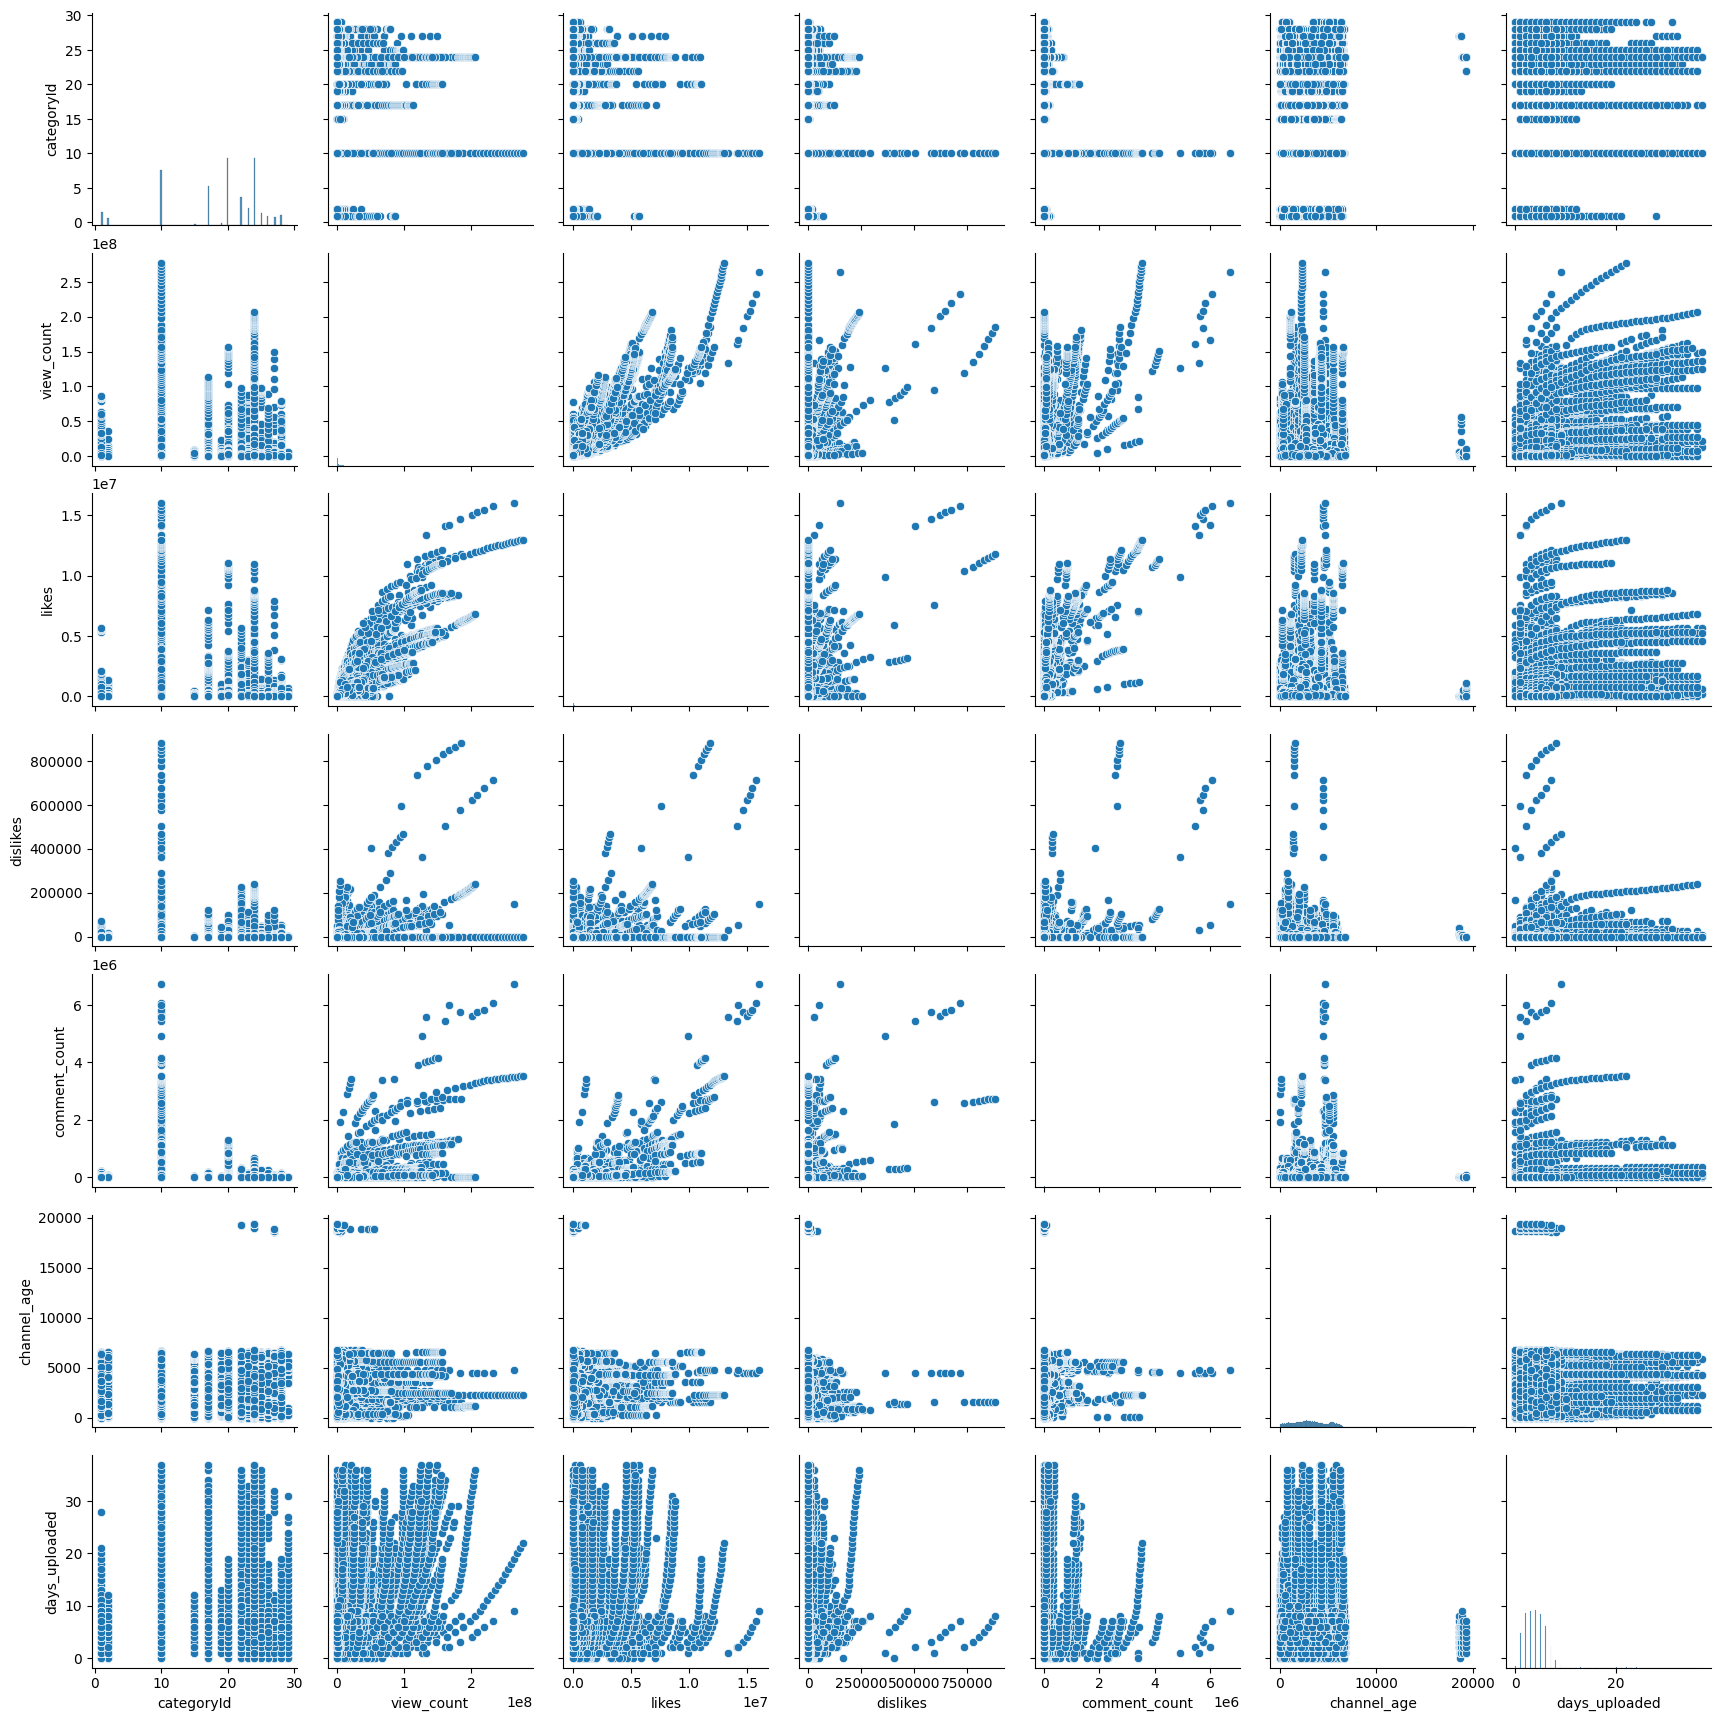

In [4]:
sns.pairplot(df)


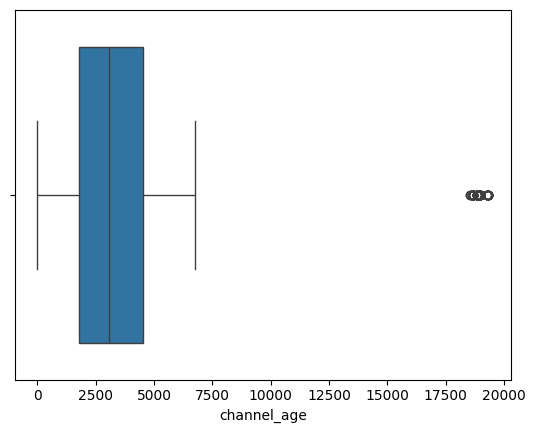

In [15]:
sns.boxplot(x=df['channel_age'])
df = df.sort_values('channel_age',ascending=True)
df = df[df['channel_age']<17500]


In [3]:
#broj nedostajućih vrednosti po kolonama
view_count_mean = df['view_count'].mean()
df["view_count"] = df["view_count"].replace(0,view_count_mean)


In [4]:
likes_mean = df['likes'].mean()
df["likes"] = df["likes"].replace(0,likes_mean)


In [5]:
percent_of_views = df['dislikes'] / df['view_count'].where(df['dislikes'] > 0, 1)
percent_of_likes = df['dislikes'] / df['likes'].where(df['dislikes'] > 0, 1)
      
mean_value_of_percent_from_views = sum(percent_of_views) / len(percent_of_views)
mean_value_of_percent_from_likes = sum(percent_of_likes) / len(percent_of_likes)

final_dislikes = (mean_value_of_percent_from_likes + mean_value_of_percent_from_views) / 2;

df['dislikes'] = df.apply(lambda row: ((row['likes'] + row['view_count']) / 2 * final_dislikes if row['dislikes'] == 0 else row['dislikes']), axis=1)



In [6]:
#duplikati
df.nunique()


categoryId           15
view_count       234651
likes            130808
dislikes         156811
comment_count     34423
channel_age        6754
days_uploaded        38
dtype: int64

In [7]:
duplicate_all = df.loc[df.duplicated(keep=False).values]

duplicate_all


,categoryId,view_count,likes,dislikes,comment_count,channel_age,days_uploaded
3499,22,162958.0,16013.00000,92.000000,1098,61,3
3500,22,162958.0,16013.00000,92.000000,1098,61,3
38214,20,116363.0,131122.74208,1018.313578,0,4980,1
38227,17,609686.0,8446.00000,225.000000,1347,566,3
38233,17,1310805.0,6243.00000,998.000000,1985,2238,3
...,...,...,...,...,...,...,...
38845,27,448881.0,18965.00000,265.000000,1386,4033,2
38846,24,463373.0,27957.00000,609.000000,2072,2577,3
38848,23,3361953.0,296359.00000,3596.000000,28468,2409,4
38849,22,1688785.0,55264.00000,677.000000,2075,186,4


In [8]:
df = df.drop_duplicates()
df


,categoryId,view_count,likes,dislikes,comment_count,channel_age,days_uploaded
0,22,1514614.0,156908.0,5855.000000,35313,1958,1
1,20,2381688.0,146739.0,2794.000000,16549,566,1
2,24,2038853.0,353787.0,2628.000000,40221,4918,1
3,10,496771.0,23251.0,1856.000000,7647,5088,1
4,26,1123889.0,45802.0,964.000000,2196,4004,1
...,...,...,...,...,...,...,...
245982,23,563422.0,68917.0,2601.844389,1822,3634,7
245983,20,2440589.0,114121.0,10511.700022,5828,2833,7
245984,17,474333.0,5730.0,1975.284180,343,2027,6
245985,24,804338.0,29540.0,3431.103879,1972,6764,6


In [9]:
df.to_csv('../data/preprocessed_data.csv', index=False)